# Nice
first jupyter notebook shit

In [1581]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import itertools

In [1582]:
#reading data from csv file
csv = pd.read_csv('/home/arash/dev/python-workspace/#1/sources/insurance.csv')

In [1583]:
# Extract columns
ages = csv['age'].tolist()
sexes = csv['sex'].tolist()
bmis = csv['bmi'].tolist()
children = csv['children'].tolist()
smoker = csv['smoker'].tolist()
regions = csv['region'].tolist()
charges = csv['charges'].tolist()

numerical_columns = ['age', 'bmi', 'children', 'charges']
nominal_cloumns = ['sex', 'smoker', 'region']

In [1584]:
print("Here are the first 10 rows of our data:")
print(csv.head(10))

Here are the first 10 rows of our data:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [1585]:
print("\nA summary of our numerical data:")
print(csv.describe())


A summary of our numerical data:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [1586]:
print("Count of unique values for each column:")
print(csv.nunique())

Count of unique values for each column:
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [1587]:
print("Count of non-null values for each column:")
print(csv.count())

Count of non-null values for each column:
age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


In [1588]:
for column in nominal_cloumns:
    print(f"\nValue counts for {column}:")
    print(csv[column].value_counts())


Value counts for sex:
male      676
female    662
Name: sex, dtype: int64

Value counts for smoker:
no     1064
yes     274
Name: smoker, dtype: int64

Value counts for region:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



Correlation matrix for our numeric data:


/tmp/ipykernel_5488/4244167015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = csv.corr()


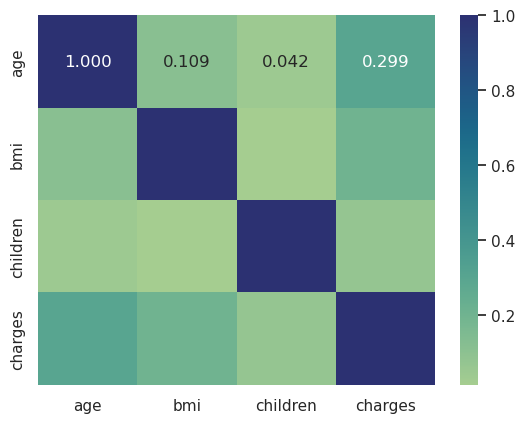

In [1589]:
correlation_matrix = csv.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".3f")
print("\nCorrelation matrix for our numeric data:")
plt.show()

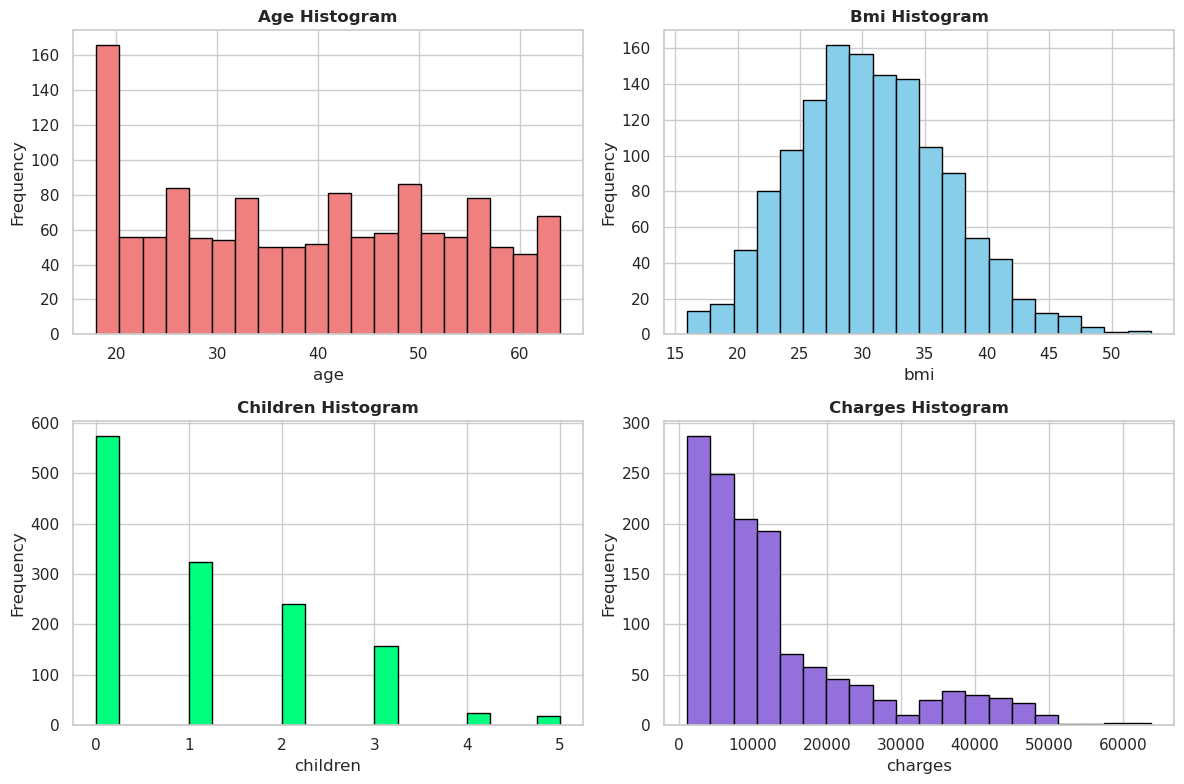

In [1590]:
# create a 2 * 2 grid of subplots
# figsize is in inches
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

colors = ['lightcoral', 'skyblue', 'springgreen', 'mediumpurple']

# enumarate() returns pairs of (index, element)
for index, column in enumerate(numerical_columns):
    # floor division of i / 2
    row_index = index // 2

    # remainder of division i / 2
    col_index = index % 2
    
    axes[row_index, col_index].hist(csv[column], bins=20, edgecolor='black', color=colors[index])
    axes[row_index, col_index].set_title(f"{column.capitalize()} Histogram", fontweight='bold')
    axes[row_index, col_index].set_xlabel(f"{column}")
    axes[row_index, col_index].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

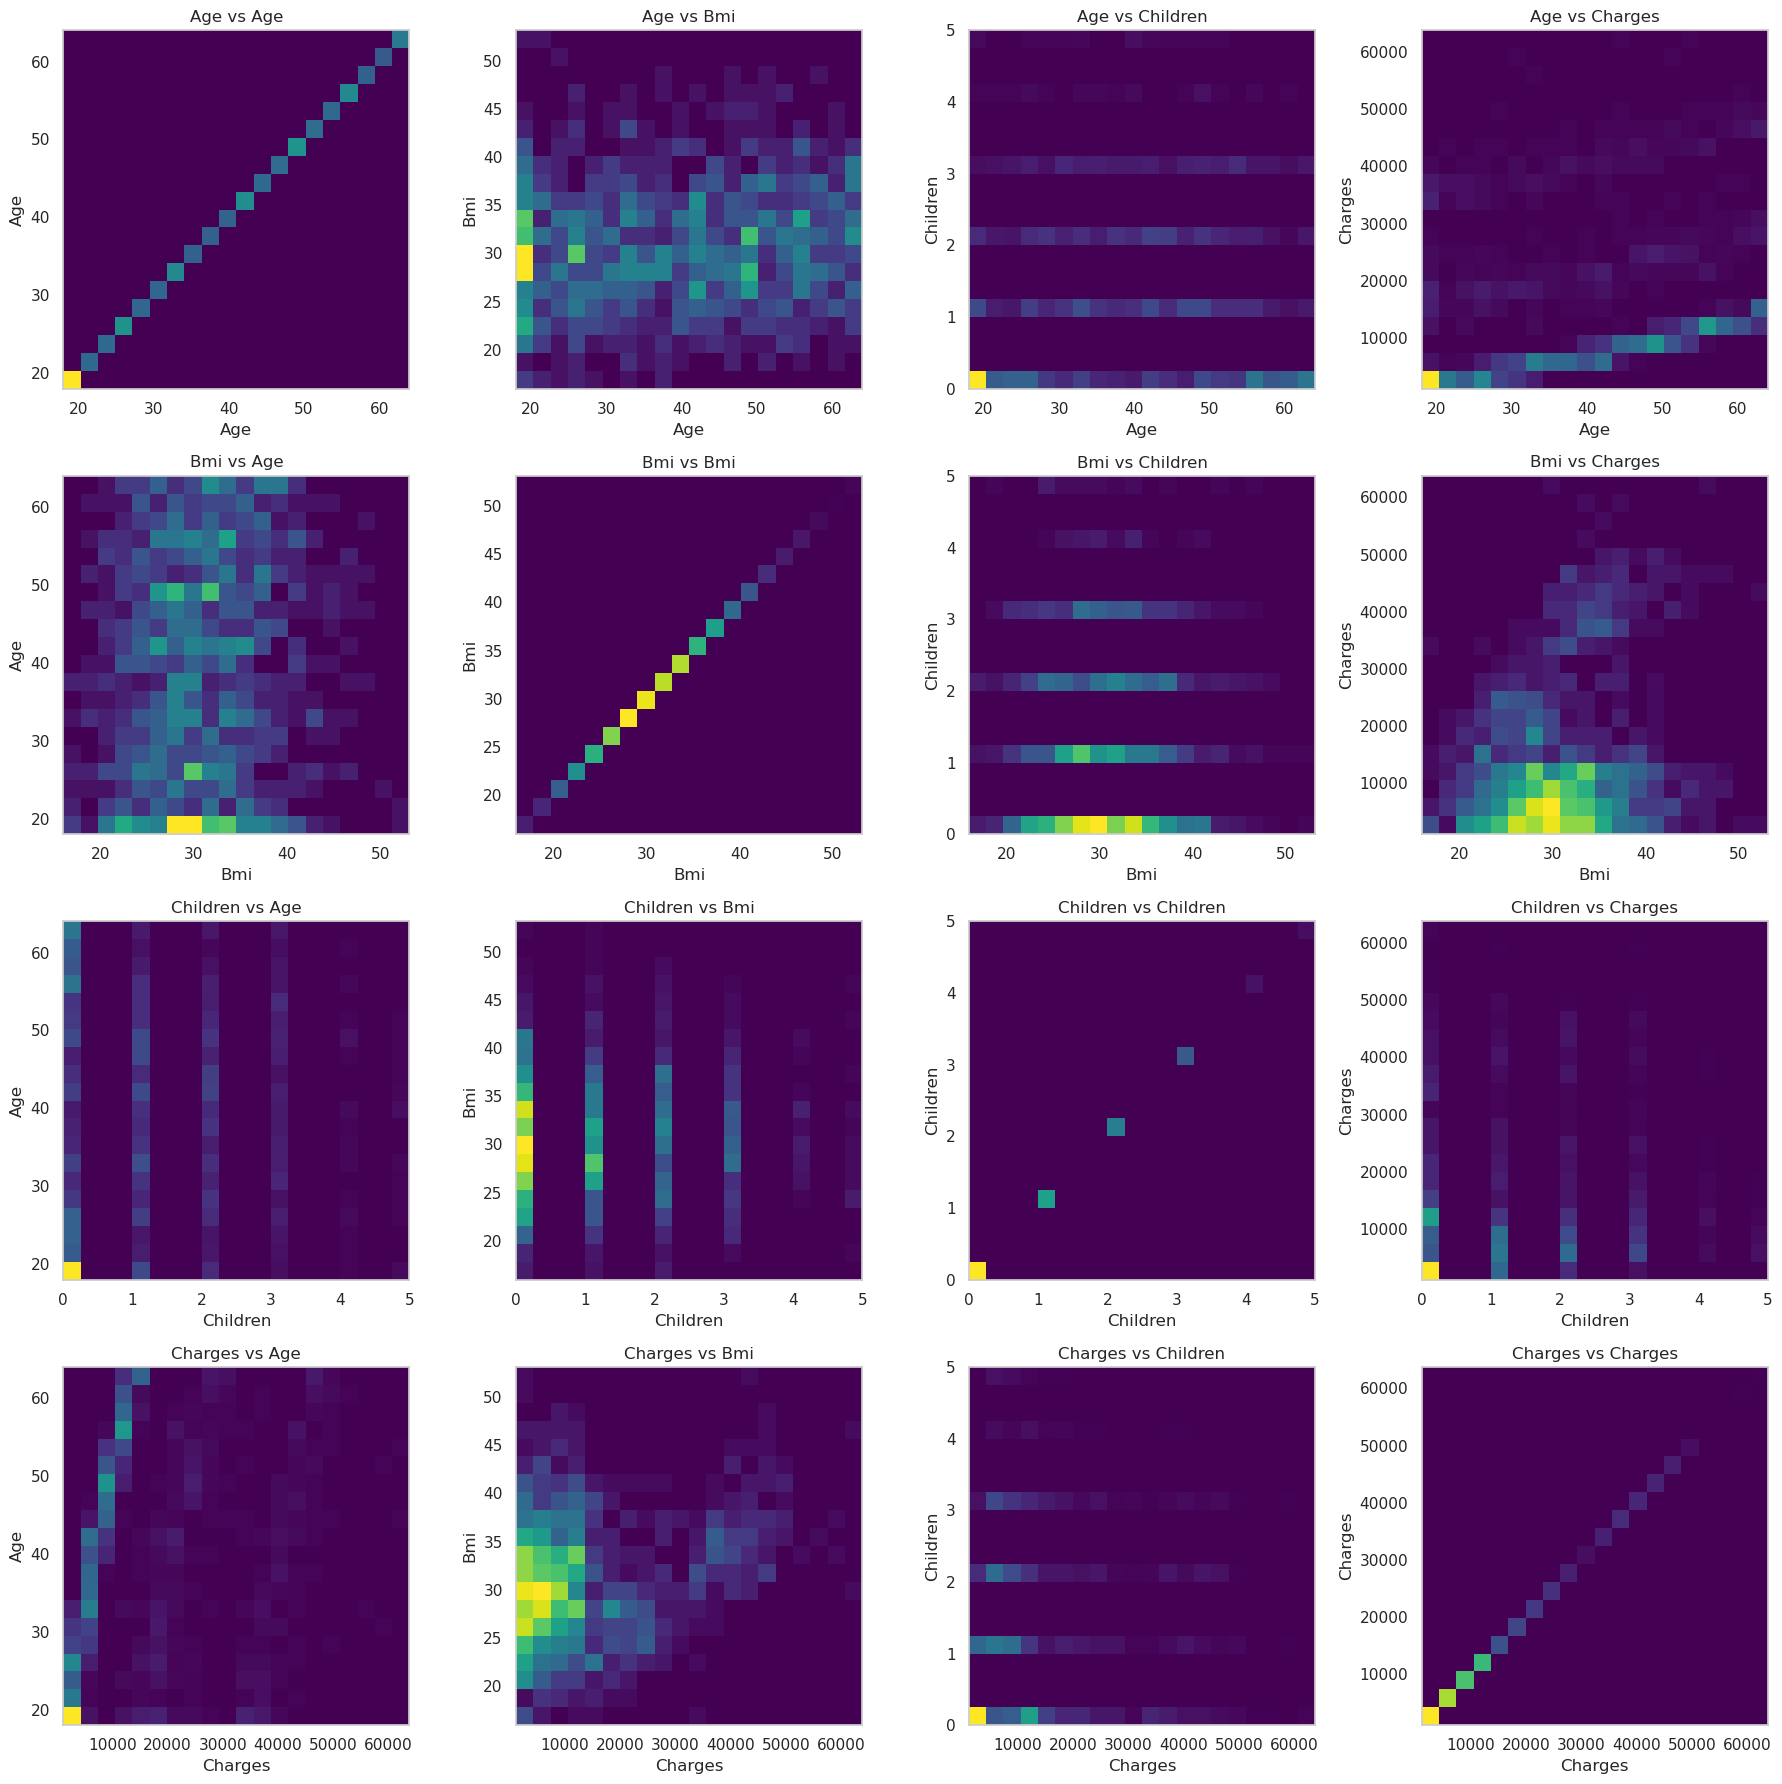

In [1591]:
# Specify the indices you want to include
x_included_indicies = [0, 1, 2, 3]
y_included_indicies = [0, 1, 2, 3]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(18, 18))

# Plot 2D histograms for pairs of numerical columns with specific indices
for i, (index_x, column_x) in enumerate(zip(range(len(numerical_columns)), numerical_columns)):
    if index_x in x_included_indicies:
        for j, (index_y, column_y) in enumerate(zip(range(len(numerical_columns)), numerical_columns)):
            if index_y in y_included_indicies:
                ax = axes[i, j]
                ax.hist2d(csv[column_x], csv[column_y], bins=20, cmap='viridis')
                ax.set_title(f'{column_x.capitalize()} vs {column_y.capitalize()}')
                ax.set_xlabel(column_x.capitalize())
                ax.set_ylabel(column_y.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

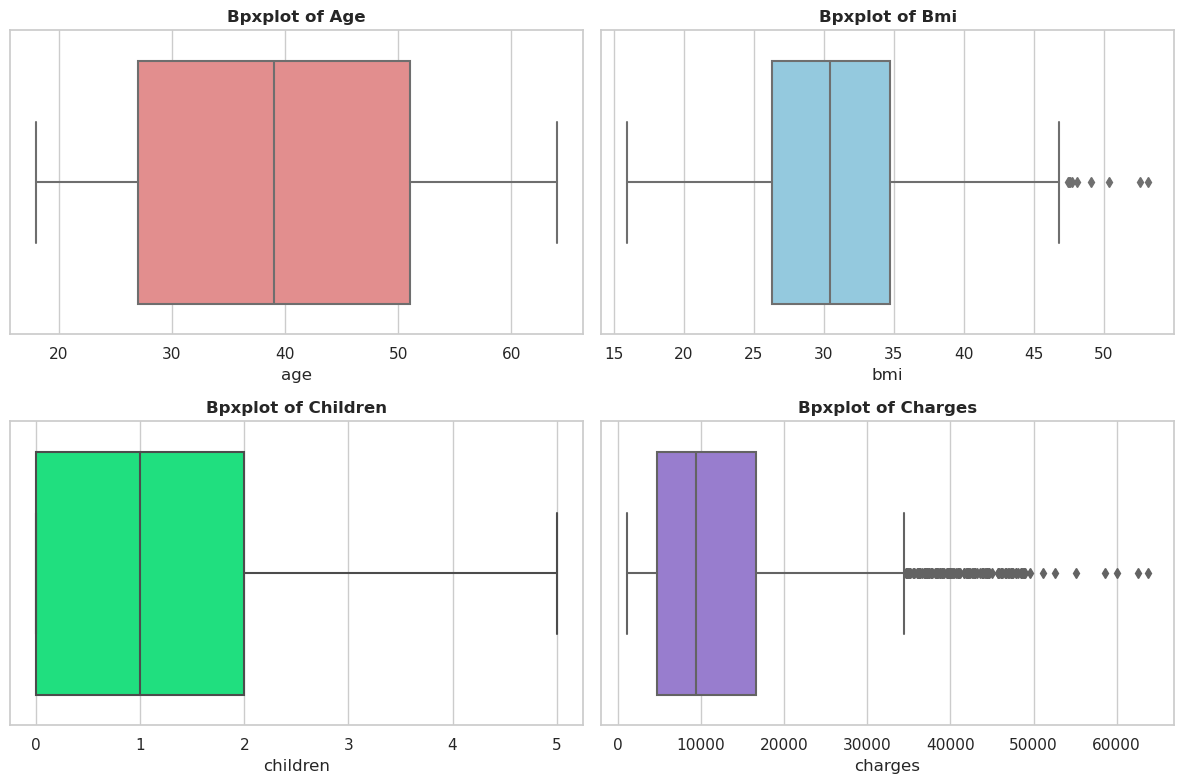

In [1592]:
# Create a box plot for numerical attributes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for index, column in enumerate(numerical_columns): 
    # floor division of i / 2
    row_index = index // 2

    # remainder of division i / 2
    col_index = index % 2

    sns.boxplot(x=csv[column], ax=axes[row_index, col_index], color=colors[index])
    axes[row_index, col_index].set_title(f"Bpxplot of {column.capitalize()}", fontweight='bold')

plt.tight_layout()
plt.show()

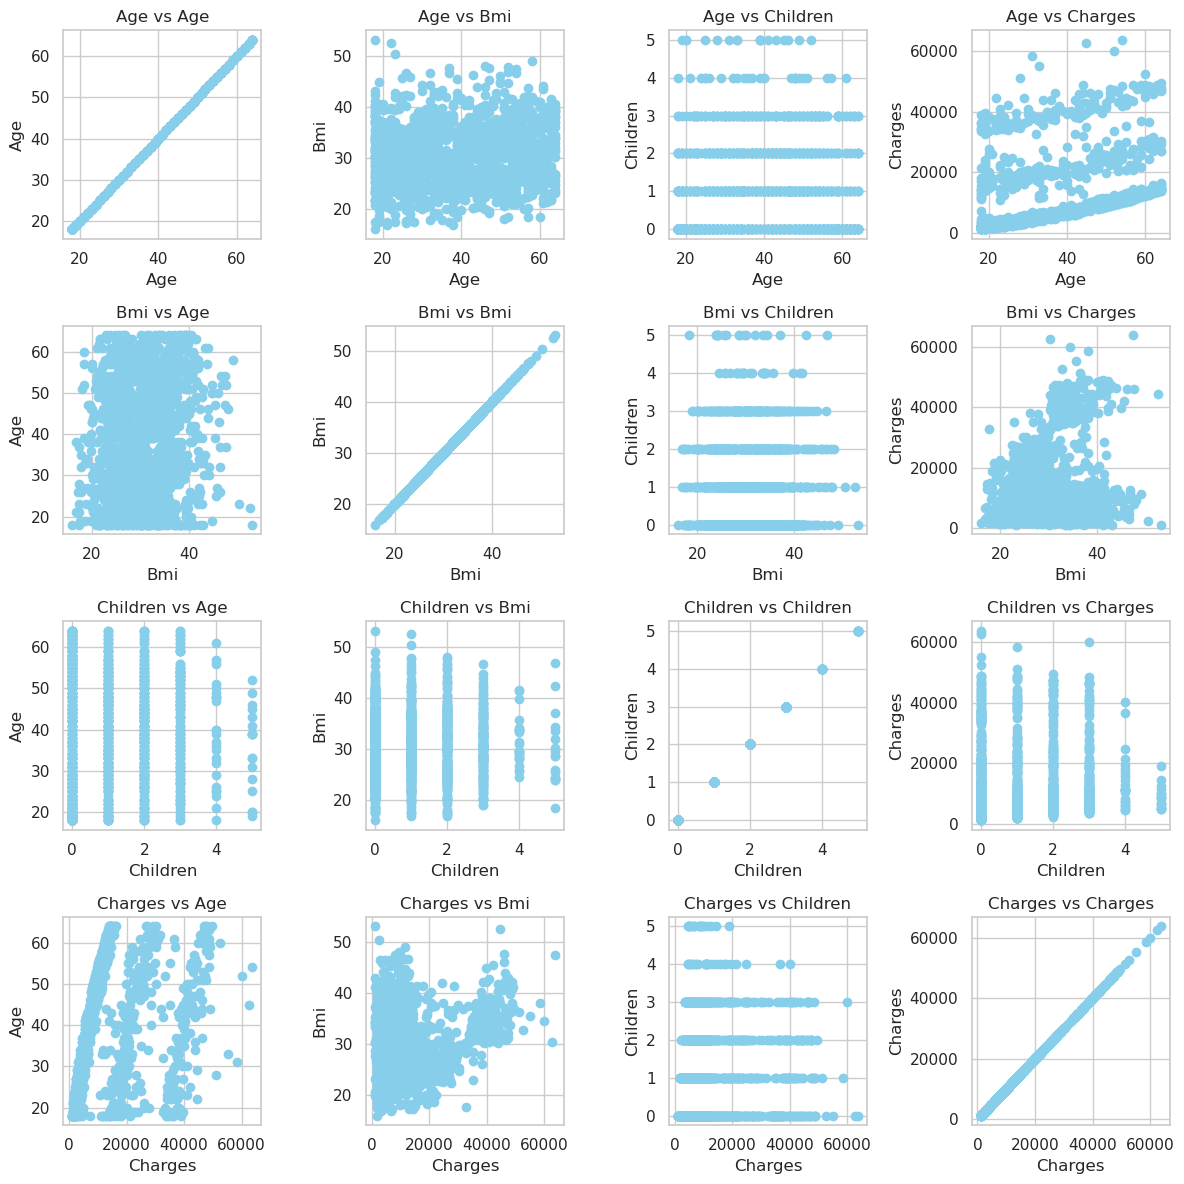

In [1593]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Iterate over numerical columns
for i, (index_x, column_x) in enumerate(zip(range(len(numerical_columns)), numerical_columns)):
    if index_x in x_included_indicies:
        for j, (index_y, column_y) in enumerate(zip(range(len(numerical_columns)), numerical_columns)):
            if index_y in y_included_indicies:
                # Plot scatter plot
                axes[i, j].scatter(csv[column_x], csv[column_y], color='skyblue')
                axes[i, j].set_title(f'{column_x.capitalize()} vs {column_y.capitalize()}')
                axes[i, j].set_xlabel(column_x.capitalize())
                axes[i, j].set_ylabel(column_y.capitalize())

plt.tight_layout()
plt.show()